In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = 'D:/Fall 2023/DLS/Project/Combined_dataset'

datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

target_size = (256, 256)
batch_size = 256

train_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

class_labels = train_dataset.class_indices
print("Class Labels:", class_labels)
print("Train Dataset Shape:", train_dataset.samples, "images,", len(class_labels), "classes")
print("Validation Dataset Shape:", validation_dataset.samples, "images,", len(class_labels), "classes")

Found 17974 images belonging to 21 classes.
Found 4491 images belonging to 21 classes.
Class Labels: {'Mango  Gall Midge': 0, 'Mango Anthracnose': 1, 'Mango Bacterial Canker': 2, 'Mango Cutting Weevil': 3, 'Mango Die Back': 4, 'Mango Healthy': 5, 'Mango Powdery Mildew': 6, 'Mango Sooty Mould': 7, 'Rice Bacterial leaf blight': 8, 'Rice Brown spot': 9, 'Rice Leaf smut': 10, 'Tomato___Bacterial_spot': 11, 'Tomato___Early_blight': 12, 'Tomato___Late_blight': 13, 'Tomato___Leaf_Mold': 14, 'Tomato___Septoria_leaf_spot': 15, 'Tomato___Spider_mites Two-spotted_spider_mite': 16, 'Tomato___Target_Spot': 17, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 18, 'Tomato___Tomato_mosaic_virus': 19, 'Tomato___healthy': 20}
Train Dataset Shape: 17974 images, 21 classes
Validation Dataset Shape: 4491 images, 21 classes


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 21

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [3]:
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np

y_true_new = np.array(train_dataset.classes)

sample_weights_new = compute_sample_weight('balanced', y_true_new)

class_weight_dict_new = dict(enumerate(sample_weights_new))

In [4]:
train_steps_per_epoch = train_dataset.samples // batch_size
validation_steps_per_epoch = validation_dataset.samples // batch_size


history = model.fit(
    train_dataset,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    class_weight=class_weight_dict_new,
    validation_data=validation_dataset,
    validation_steps=validation_steps_per_epoch
)


Epoch 1/10
70/70 [==============================] - 658s 9s/step - loss: 3.8023 - accuracy: 0.4535 - val_loss: 1.1045 - val_accuracy: 0.6374
Epoch 2/10
70/70 [==============================] - 571s 8s/step - loss: 1.6122 - accuracy: 0.7510 - val_loss: 0.7179 - val_accuracy: 0.7622
Epoch 3/10
70/70 [==============================] - 588s 8s/step - loss: 1.0234 - accuracy: 0.8437 - val_loss: 0.6515 - val_accuracy: 0.7787
Epoch 4/10
70/70 [==============================] - 520s 7s/step - loss: 0.7232 - accuracy: 0.8884 - val_loss: 0.4925 - val_accuracy: 0.8396
Epoch 5/10
70/70 [==============================] - 1943s 28s/step - loss: 0.5131 - accuracy: 0.9204 - val_loss: 0.4050 - val_accuracy: 0.8720
Epoch 6/10
70/70 [==============================] - 410s 6s/step - loss: 0.3977 - accuracy: 0.9396 - val_loss: 0.4589 - val_accuracy: 0.8642
Epoch 7/10
70/70 [==============================] - 412s 6s/step - loss: 0.3249 - accuracy: 0.9509 - val_loss: 0.4432 - val_accuracy: 0.8637
Epoch 8/10


In [5]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
img_path = 'D:/Fall 2023/DLS/Project/Combined_dataset/Tomato___Late_blight/0ab1cab4-a0c9-4323-9a64-cdafa4342a9b___GHLB2 Leaf 8918.JPG'
#"D:\Fall 2023\DLS\Project\Combined_dataset\Tomato___Late_blight\0ab1cab4-a0c9-4323-9a64-cdafa4342a9b___GHLB2 Leaf 8918.JPG"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [6]:
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions)

class_labels = ['Mango  Gall Midge', 'Mango Anthracnose', 'Mango Bacterial Canker', 'Mango Cutting Weevil', 'Mango Die Back', 'Mango Healthy',
                'Mango Powdery Mildew', 'Mango Sooty Mould', 'Rice Bacterial leaf blight', 'Rice Brown spot', 'Rice Leaf smut', 'Tomato___Bacterial_spot',
                'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 
                'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

predicted_disease = class_labels[predicted_class]
print(f"Predicted Disease: {predicted_disease}")

1/1 [==============================] - 0s 265ms/step
Predicted Disease: Tomato___Late_blight


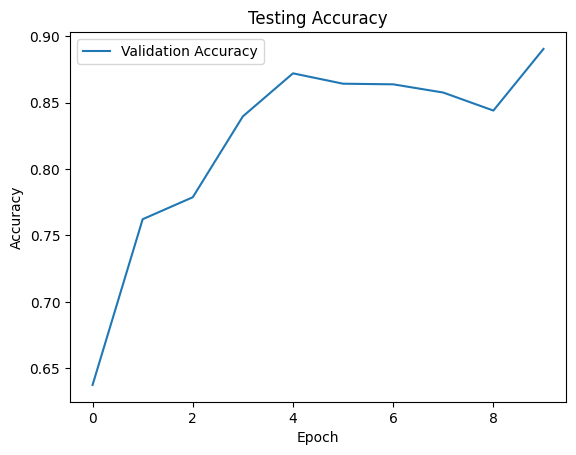

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()